# EDA

## 데이터 기본
### 1. train.csv : 학습 데이터
- id : 샘플 아이디
- title : 제조사 모델명
- odometer : 주행 거리
- location : 판매처(나이지리아 도시)
- isimported : 현지 사용 여부
- engine : 엔진 종류
- transmission : 트랜스미션 종류
- fuel : 연료 종류
- paint : 페인트 색상
- year : 제조년도
- target : 자동차 가격
### 2. test.csv : 테스트 데이터
- id : 샘플 아이디
- title : 제조사 모델명
- odometer : 주행 거리
- location : 판매처(나이지리아 도시)
- isimported : 현지 사용 여부
- engine : 엔진 종류
- transmission : 트랜스미션 종류
- fuel : 연료 종류
- paint : 페인트 색상
- year : 제조년도
### 3. sample_submission.csv : 제출 양식
- id : 샘플 아이디
- target : 자동차 가격

## 데이터 불러오기 및 기본 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns

In [2]:
sample_submission=pd.read_csv('./data/sample_submission.csv')
test=pd.read_csv('./data/test.csv')
train=pd.read_csv('./data/train.csv')

In [3]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [4]:
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000


In [5]:
df_list=[train, test]
for i in df_list:
    print('---shape---')
    print(i.shape)
    print()
    print('---null---')
    print(i.isnull().sum())
    print('---null---')
    print(i.info())
    print('-' * 50)

---shape---
(1015, 11)

---null---
id              0
title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
year            0
target          0
dtype: int64
---null---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1015 non-null   int64 
 1   title         1015 non-null   object
 2   odometer      1015 non-null   int64 
 3   location      1015 non-null   object
 4   isimported    1015 non-null   object
 5   engine        1015 non-null   object
 6   transmission  1015 non-null   object
 7   fuel          1015 non-null   object
 8   paint         1015 non-null   object
 9   year          1015 non-null   int64 
 10  target        1015 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 87.4+ KB
None
----------------------------------

In [6]:
for i in df_list:
    print('-' * 22)
    print(sum(i.duplicated()))
    print()

----------------------
0

----------------------
0



## 타겟변수 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

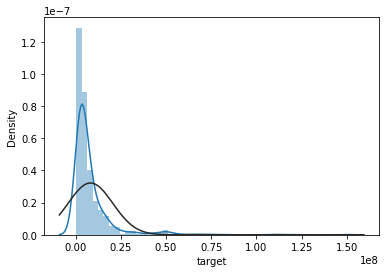

In [7]:
target=train['target']

from scipy import stats
from scipy.stats import norm

sns.distplot(train['target'], fit=norm)

((array([-3.2018795 , -2.93699643, -2.78920173, ...,  2.78920173,
          2.93699643,  3.2018795 ]),
  array([   400000,    400000,    400000, ..., 110015000, 117015000,
         150015008], dtype=int64)),
 (8938213.431636602, 8243204.450246304, 0.7194519736543091))

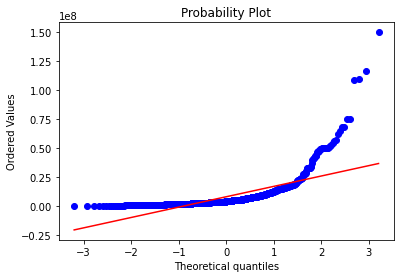

In [8]:
stats.probplot(train['target'],plot=plt)

#왼쪽으로 치우쳐저 있기에 log나 root로 변환해보려한다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logTarget', ylabel='Density'>

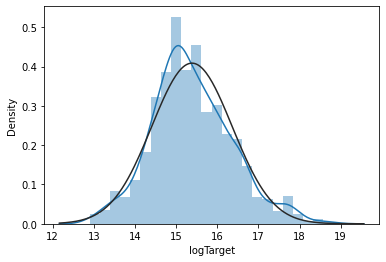

In [9]:
train['logTarget']=np.log(target+1)

sns.distplot(train['logTarget'], fit=norm)

((array([-3.2018795 , -2.93699643, -2.78920173, ...,  2.78920173,
          2.93699643,  3.2018795 ]),
  array([12.89922233, 12.89922233, 12.89922233, ..., 18.51612729,
         18.5778127 , 18.82624591])),
 (0.9735853760948998, 15.385252309424105, 0.9942432431601682))

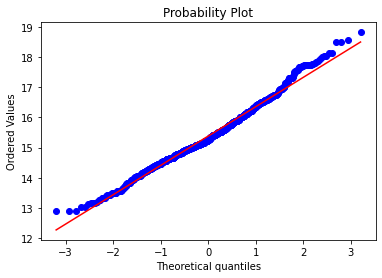

In [10]:
stats.probplot(train['logTarget'],plot=plt)

## 수치형변수
- odometer와 year

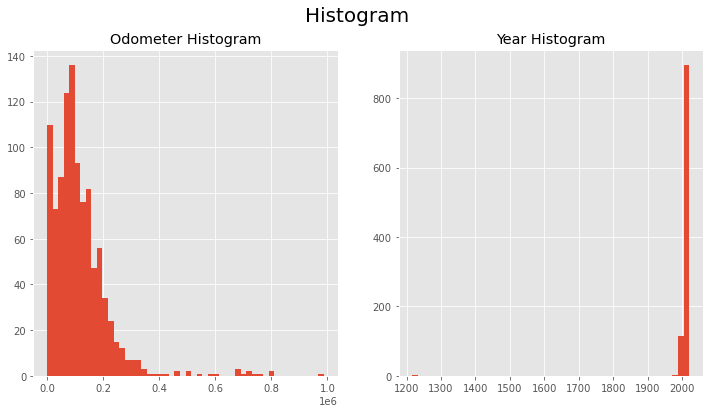

In [11]:
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train.odometer, bins=50)
plt.title('Odometer Histogram')

plt.subplot(1,2,2)
plt.hist(train.year, bins=50)
plt.title('Year Histogram')
plt.show()

year에 1900년도 이하 데이터 존재 오기입 의심됨

In [12]:
train[train['year']<1900]
#우선 오기로 가정하고 2개의 데이터 이므로 제거------------------------------------

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,logTarget
415,415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,4-cylinder(I4),manual,diesel,white,1218,6015000,15.609767
827,827,Mercedes-Benz/52,510053,Lagos,Locally used,6-cylinder(V6),manual,diesel,white,1217,75015000,18.133199


In [13]:
train = train[train['year'] > 1900]
train.shape

(1013, 12)

In [14]:
train = train.drop('id', axis = 1).reset_index().drop('index', axis = 1).reset_index().rename({'index':'id'}, axis = 'columns')
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,logTarget
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,16.430348
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,17.312473
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,16.109559
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,15.154451
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,15.814962


### 통계

In [15]:
data_description = train.describe().iloc[:,1:3]
data_description

,odometer,year
count,1013.000000,1013.000000
mean,116171.015795,2009.946693
std,104147.052690,5.540466
min,0.000000,1980.000000
25%,55775.000000,2006.000000
50%,94803.000000,2010.000000
75%,152878.000000,2014.000000
max,987322.000000,2020.000000


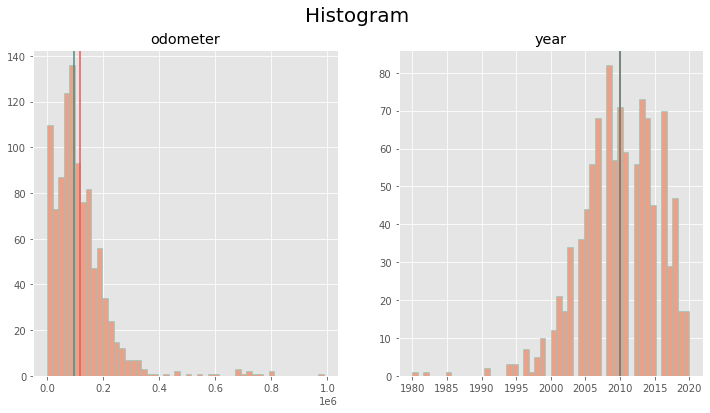

In [16]:
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train['odometer'], bins=50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('odometer')
plt.axvline(data_description['odometer']['mean'], c='#f55354', label = f"mean = {round(data_description['odometer']['mean'], 2)}")
plt.axvline(data_description['odometer']['50%'], c='#518d7d', label = f"median = {round(data_description['odometer']['50%'], 2)}")

plt.subplot(1,2,2)
# 수치형 데이터 통계치 그래프
plt.hist(train['year'], bins = 50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('year')
plt.axvline(data_description['year']['mean'], c='#f55354', label = f"mean = {round(data_description['year']['mean'], 2)}")
plt.axvline(data_description['year']['50%'], c='#518d7d', label = f"median = {round(data_description['year']['50%'], 2)}")

In [17]:
print('Odometer 평균은', round(data_description['odometer']['mean']), '입니다')
print('Odometer 중앙값은', round(data_description['odometer']['50%']), '입니다')

print('Year 평균은', round(data_description['year']['mean']), '입니다')
print('Year 중앙값은', round(data_description['year']['50%']), '입니다')

Odometer 평균은 116171 입니다
Odometer 중앙값은 94803 입니다
Year 평균은 2010 입니다
Year 중앙값은 2010 입니다


### 타겟(가격)과 수치형 변수 상관관계

Text(0.5, 1.0, 'year')

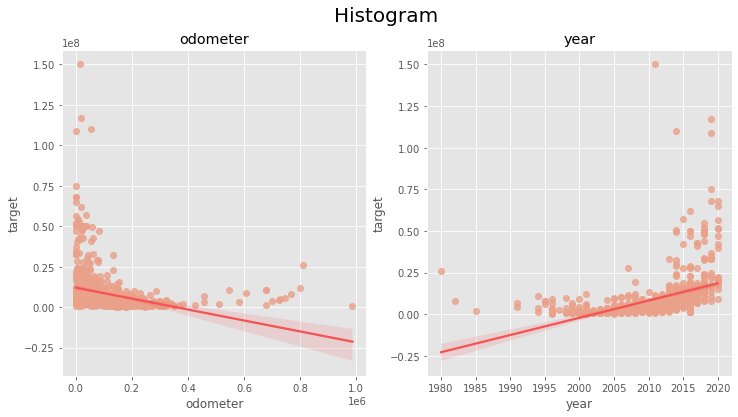

In [18]:
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
sns.regplot(x='odometer', y='target', data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'})
plt.title('odometer')

plt.subplot(1,2,2)
sns.regplot(x='year', y='target', data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'})
plt.title('year')

- 그래프를 통하여 target와 odometer 관계의 추세선을 확인해 보아 왼쪽 아래 방향을 향하고 있으므로 음의 상관관계를 가지고 있음을 도출
- 그래프를 통하여 target와 year 관계의 추세선을 확인해 보아 왼쪽 위 방향을 향하고 있으므로 양의 상관관계를 가지고 있음을 도출

### 히트맵

In [19]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[['odometer', 'year', 'target']]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Text(0.5, 1.0, 'Correlation between features')

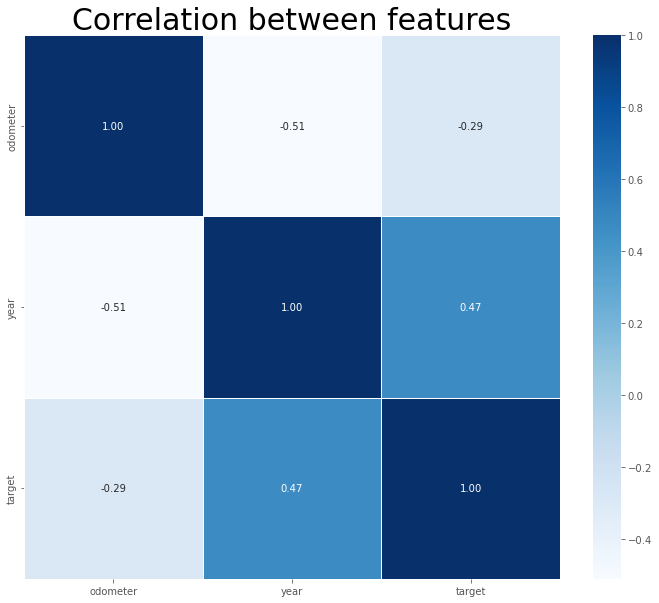

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [21]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['target'].sort_values(ascending=False), columns=['target'])
df_temp28.style.background_gradient(cmap='viridis')

,target
target,1.000000
year,0.468276
odometer,-0.287731


- 그래프를 보니 year가 높은 양의 상관관계가 있는것으로 나타냈다. 이는 최근 연도일수록 가격이 높아진다는 것으로 해석할 수 
- 또한 odometer도 -0.29로 음의 상관관계를 띄므로 전반적으로 주행거리가 많을 수록 가격이 낮아질 것이라고 해석할 수

## 범주형 변수

In [22]:
train.describe(include="object")

,title,location,isimported,engine,transmission,fuel,paint
count,1013,1013,1013,1013,1013,1013,1013
unique,201,13,3,8,2,2,76
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,129,790,744,617,965,970,292


In [23]:
train.describe(include="object").columns

Index(['title', 'location', 'isimported', 'engine', 'transmission', 'fuel',
       'paint'],
      dtype='object')

### 파생변수 생성
#### 브랜드

In [25]:
train['title'].value_counts()[:20]

Toyota Camry            129
Toyota Corolla          108
Toyota Highlander        50
Toyota Sienna            49
Toyota RAV 4             40
Honda Accord             38
Lexus RX 350             33
Lexus ES 350             24
Toyota Venza             16
Lexus GX 460             16
Honda Pilot              15
Lexus LX 570             14
Mercedes-Benz ML 350     13
Toyota Avalon            13
Mercedes-Benz GL 450     12
Toyota Matrix            12
Toyota Tacoma            12
Ford Explorer            12
Mercedes-Benz E 350      12
Toyota 4-Runner          12
Name: title, dtype: int64

In [27]:
train['brand'] = train['title'].apply(lambda x : x.split(" ")[0])
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,logTarget,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,16.430348,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,17.312473,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,16.109559,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,15.154451,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,15.814962,Toyota


In [30]:
train['brand'].value_counts().head()

Toyota           474
Lexus            122
Mercedes-Benz    104
Honda             81
Ford              36
Name: brand, dtype: int64

In [31]:
print('title의 unique 카테고리 개수 : ', len(train['title'].value_counts()))
print('brand의 unique 카테고리 개수 : ', len(train['brand'].value_counts()))

title의 unique 카테고리 개수 :  201
brand의 unique 카테고리 개수 :  41


#### 색상

In [32]:
train['paint'].value_counts()[:20]

Black        292
White        115
Silver       103
Grey          84
Blue          70
Red           53
Dark Grey     47
Gold          37
white         24
Green         18
Gray          17
Brown         16
Black         15
Dark Blue     14
Wine           8
Silver         5
Sliver         5
blue           5
red            5
Grey           3
Name: paint, dtype: int64

In [33]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

In [34]:
temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp

In [35]:
print('brand의 unique 카테고리 개수 : ', len(train['paint'].unique()))

brand의 unique 카테고리 개수 :  51


In [36]:
train['paint'].value_counts()
#오타와 명도 채도에 따른 차이를 통합

black                     310
white                     142
silver                    109
grey                       87
blue                       78
red                        58
dark grey                  48
gold                       41
green                      20
gray                       18
dark blue                  17
brown                      16
wine                        9
sliver                      5
dark ash                    4
cream                       4
ash                         3
purple                      3
yellow                      3
whiteblue                   2
dark gray                   2
maroon                      2
sky blue                    2
milk                        2
deep blue                   2
navy blue                   1
pale brown                  1
ash and black               1
magnetic gray metallic      1
skye blue                   1
off white                   1
black sand pearl            1
light silver                1
black and 

In [37]:
train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [38]:
train['paint'].value_counts()

black     312
grey      159
white     146
silver    117
blue      105
red        60
gold       42
green      21
brown      17
wine       10
ash         8
cream       4
purple      3
yellow      3
milk        2
maroon      2
beige       1
orange      1
Name: paint, dtype: int64

In [39]:
print('paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

paint의 unique 카테고리 개수 :  18


##### 히스토그램

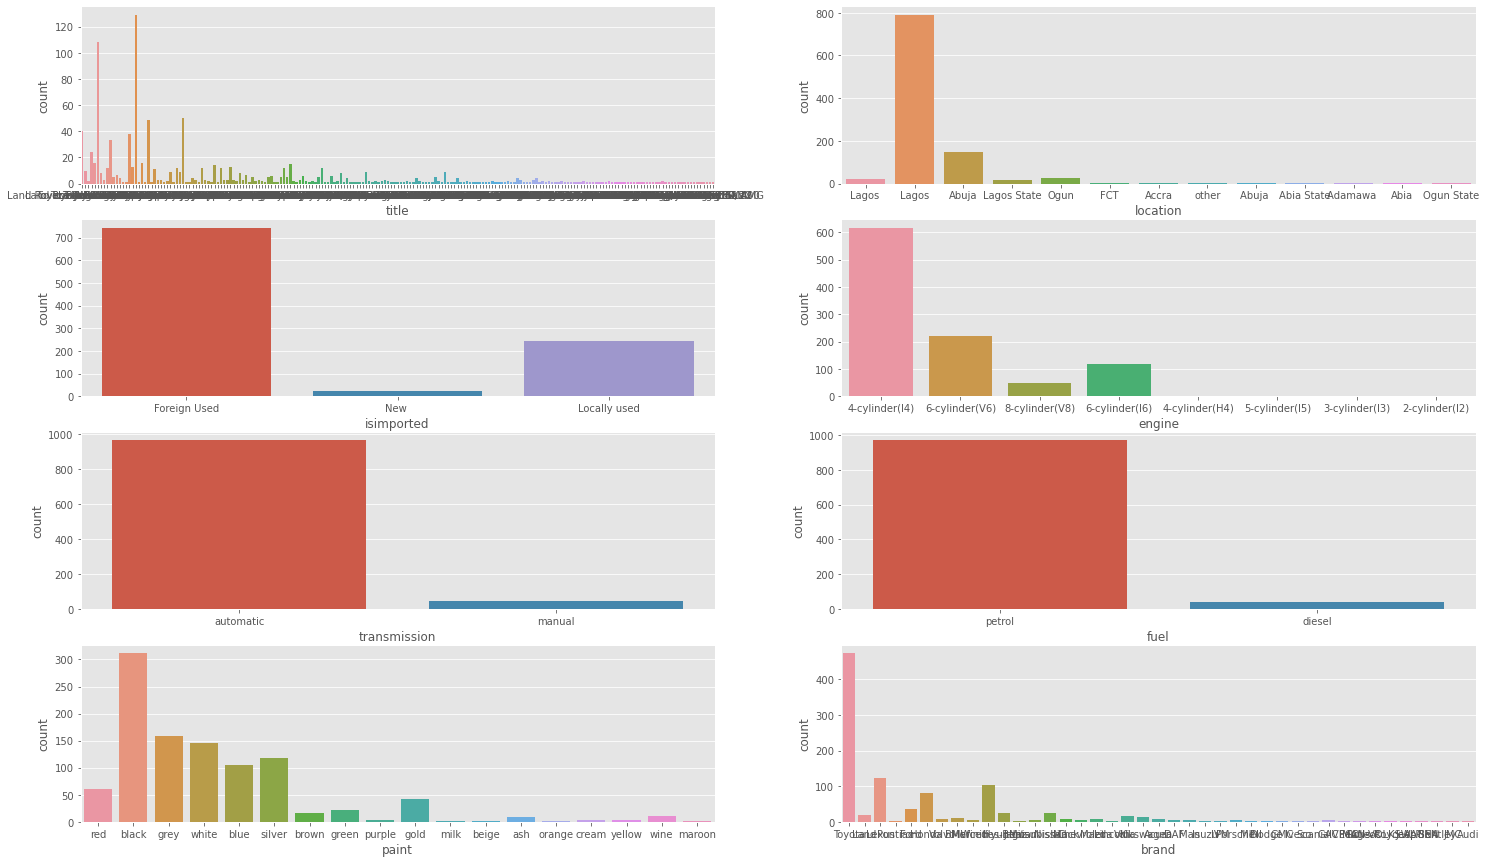

In [40]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
count = 1

for i in train.describe(include="object").columns:
    plt.subplot(4,2,count)
    # countplot 을 사용해서 데이터의 분포를 살펴본다.
    sns.countplot(data=train, x=i)
    count += 1

In [41]:
train_title10 = train[train['title'].apply(lambda x : x in train['title'].value_counts()[:10].keys())]
train_brand10 = train[train['brand'].apply(lambda x : x in train['brand'].value_counts()[:10].keys())]

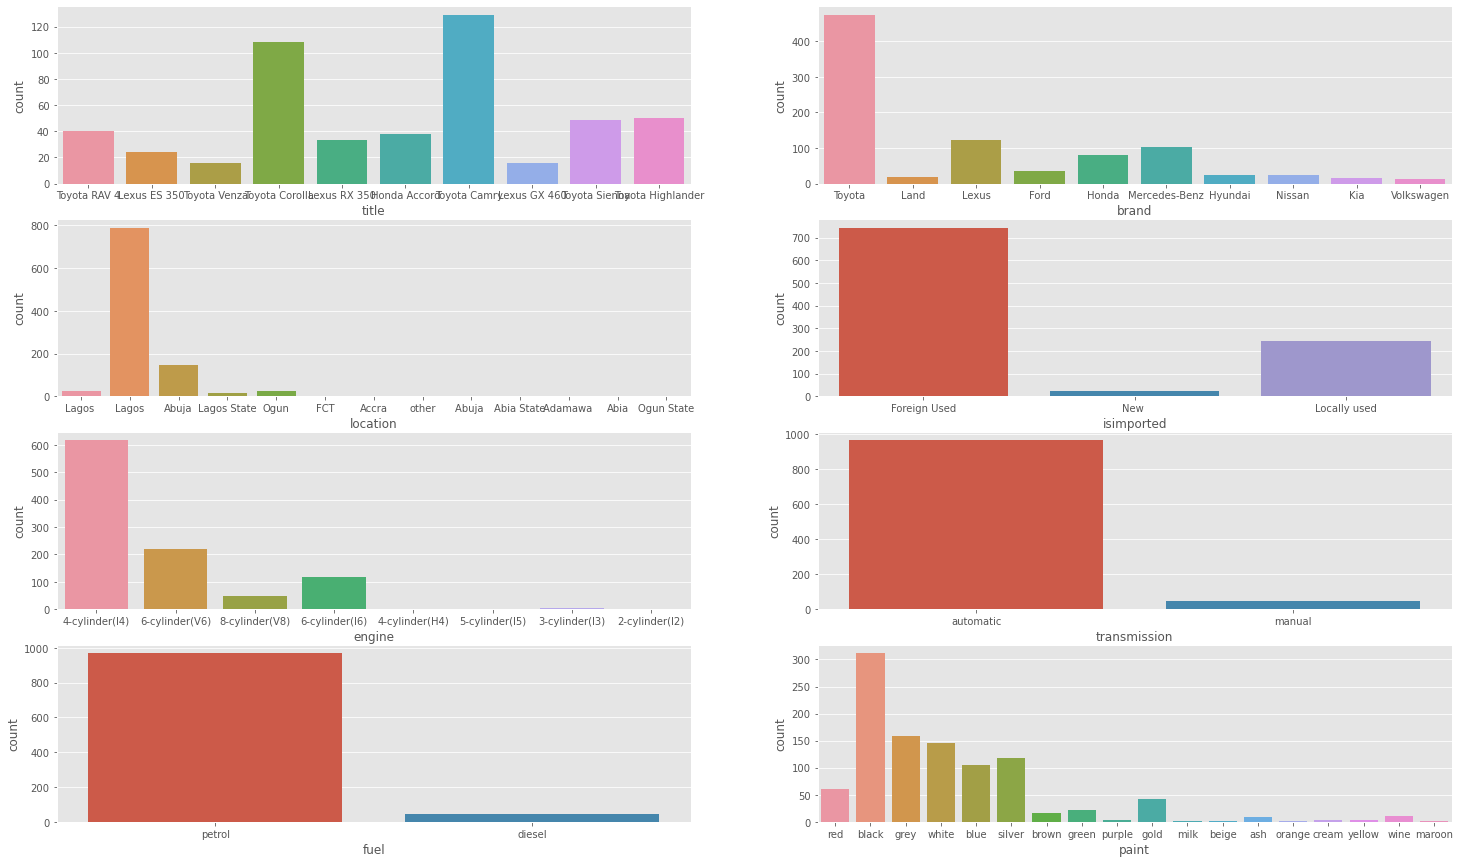

In [42]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.countplot(data=train_title10, x='title')
plt.subplot(4,2,2)
sns.countplot(data=train_brand10, x='brand')
count = 3

for i in train.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.countplot(data=train, x=i)
    count += 1

1. title과 brand에서 Toyota가 압도적으로 중고차가 많다는 것
2. location에서 Lagos 지역이 압도적으로 중고차가 많다는 것
3. isimported에서 New 차는 적고, Foreign Used>Locally used>New 순으로 중고차 대수가 이루어진 것
4. engine에서 4-cylinder가 압도적으로 중고차가 많다는 것
5. trainsmission에서 automatic가 압도적으로 중고차가 많다는 것
6. fuel에서 petrol가 압도적으로 중고차가 많다는 것
7. paint에서 black>grey>white>sliver>red>gold .. 순으로 중고차 대수가 이루어진 것
- isimported, transmission, fuel 등 몇몇 피쳐들이 데이터가 불균형이 심한 것을 확인할 수 있다. 따라서 몇몇 피쳐들을 가지고 모델이 정답값인 중고차 가격을 잘 맞추기엔 '경험'이 부족할 수 있을것 같다.